In [ ]:
%pip install openpyxl
"""
best setting:
max_depth=4, min_samples_leaf=4
tested settings:
max_depth=5, min_samples_leaf=5
"""

Mean Squared Error (MSE): 0.45454545454545453
Root Mean Squared Error (RMSE): 0.674199862463242


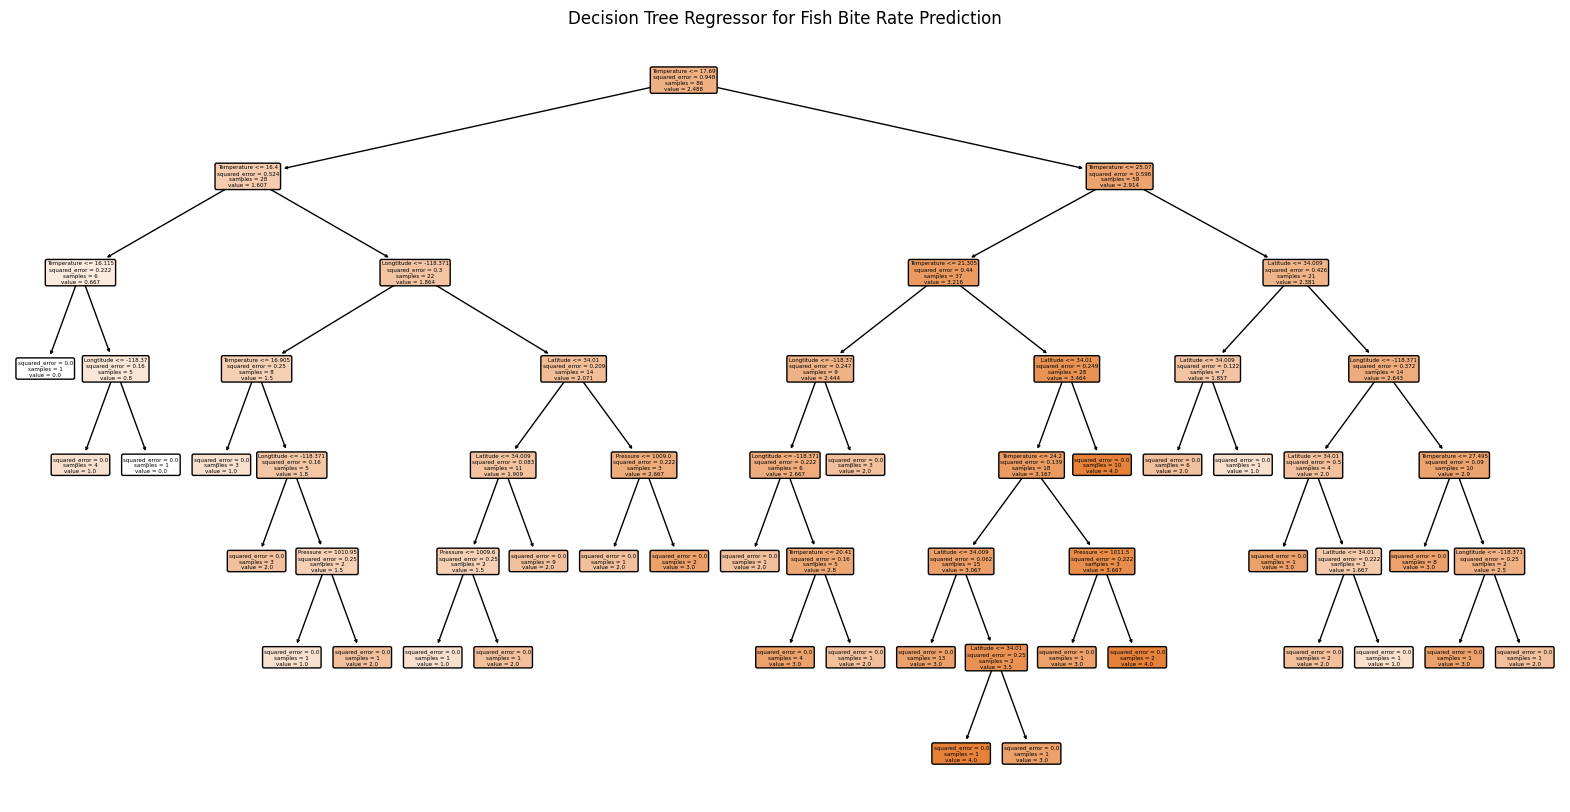

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import mean_squared_error

# Load the dataset
latest_upload_data_path = 'data.xlsx'
latest_upload_data = pd.read_excel(latest_upload_data_path, sheet_name='Sheet1')

# Prepare the features and target variable for the decision tree model
features_latest_upload = latest_upload_data[['Latitude', 'Longtitude', 'Temperature', 'Pressure', 'Water Activity']]
target_latest_upload = latest_upload_data['Bite Rate']

# Split the data into training and testing sets
X_train_latest_upload, X_test_latest_upload, y_train_latest_upload, y_test_latest_upload = train_test_split(
    features_latest_upload, target_latest_upload, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor
decision_tree_regressor_latest_upload = DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, random_state=42)
decision_tree_regressor_latest_upload.fit(X_train_latest_upload, y_train_latest_upload)

# Predict and calculate MSE for training and testing sets
y_train_pred = decision_tree_regressor_latest_upload.predict(X_train_latest_upload)
mse_train = mean_squared_error(y_train_latest_upload, y_train_pred)
rmse_train = np.sqrt(mse_train)

y_test_pred = decision_tree_regressor_latest_upload.predict(X_test_latest_upload)
mse_test = mean_squared_error(y_test_latest_upload, y_test_pred)
rmse_test = np.sqrt(mse_test)

relative_error = abs((mse_train - mse_test)/mse_test)

# Print the relative error result
print(f"Absolute Error between Training MSE and Testing MSE: {relative_error}")

# Print both training and testing MSE & RMSE
print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}\n")
print(f"Testing MSE: {mse_test}")
print(f"Testing RMSE: {rmse_test}")

# Calculate feature importances
feature_importances = decision_tree_regressor_latest_upload.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features_latest_upload.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree Regressor')
plt.gca().invert_yaxis()
plt.tight_layout()

# Save plot
plt.savefig('feature_importances.png', dpi=300)  #  PNG
plt.show()

# Plot the decision tree model
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_regressor_latest_upload, feature_names=features_latest_upload.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor for Fish Bite Rate Prediction")
plt.tight_layout()

# Save plot
plt.savefig('decision_tree_regressor.png', dpi=300)  #  PNG 
plt.show()

# Export decision tree rules as text
tree_rules = export_text(decision_tree_regressor_latest_upload, feature_names=list(features_latest_upload.columns))
print("\nDecision Tree Rules:")
print(tree_rules)